Tutorial on NetworkX

In [1]:
import urllib
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


Networks can be described in several formats e.g. adjacency matrix, edge list, etc. One of the most complete graph representations is [GML](https://en.wikipedia.org/wiki/Graph_Modelling_Language) format which look more or less like XML. See an example:

<pre><code>graph
[
  node
  [
   id A
   label "Node A"
  ]
  node
  [
   id B
   label "Node B"
  ]
  node
  [
   id C
   label "Node C"
  ]
   edge
  [
   source B
   target A
   label "Edge B to A"
  ]
  edge
  [
   source C
   target A
   label "Edge C to A"
  ]
]
</code></pre>

Thankfully, NetworkX supports almost all of recent network representations. Let's load a very famous [_Zachary's Karate Club_](http://networkdata.ics.uci.edu/data/karate/) network. Nodes in this network represent members of the club and edges between them occur if two persons also frequently communicate outside club's activities. Sadly, the organisation has splitted out into two groups due to conflict and misunderstanding between its leaders.

In [2]:
url = "https://dl.dropboxusercontent.com/s/ie3p3sctlsjnea9/karate.gml?dl=1"
with urllib.request.urlopen(url) as f:
    data = f.read().decode('utf-8')
with open('karate.gml', 'w') as f:
    f.write(data)  

/Users/ray/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


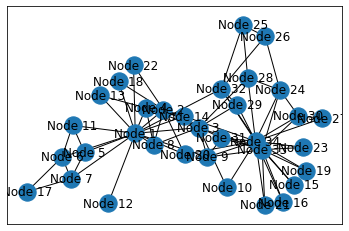

In [3]:
G = nx.read_gml(path = 'karate.gml')
nx.draw_networkx(G)

*draw_network* command has several options to improve the view of the network. For instance, let's make nodes with greater degree bigger and more colorfull.

You may need to use "dict(nx.degree(G))" and "list(k.values/keys())"

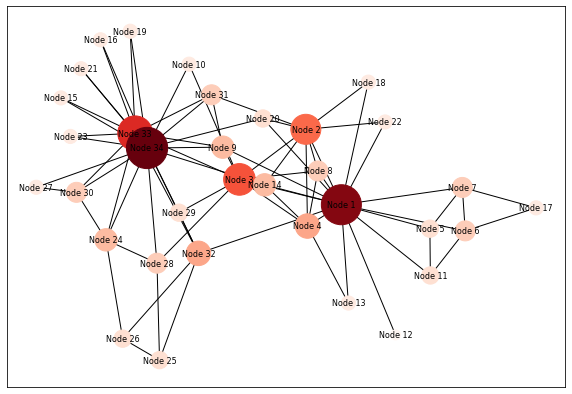

In [4]:
k = nx.degree(G)
plt.figure(1, figsize=(10,7))
coord = nx.spring_layout(G)
nx.draw_networkx(G,
                 pos=coord,
                 nodelist=list(dict(k).keys()),
                 node_size = [d*100 for d in list(dict(k).values())],
                 node_color=list(dict(k).values()),
                 font_size=8,
                 cmap=plt.cm.Reds,
                 )

Now we can clearly observe two nodes with highest degree centrality: 1 and 34. Exactly these two most important club members are responsible for the breakdown.

We also might be interested in node degree distribution and network's adjacency matrix:

Text(0.5, 1.0, "Zachary's club adjacency matrix")

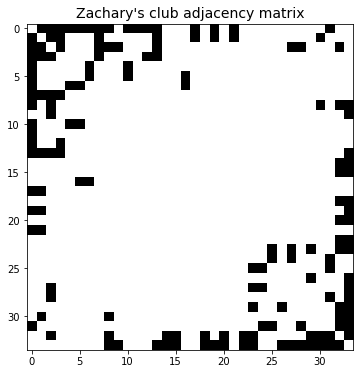

In [5]:
# load adjacency matrix
A = nx.to_numpy_matrix(G, dtype=np.bool) 
k = G.degree()
dk = dict(k)
# alternatevly you can find k as k = np.sum(A, axis=0)

# sort nodes according to degree
dk = {k.replace("Node ", ""): v for k, v in sorted(dk.items(), key=lambda item: item[1], reverse=True)}

# show adjacency matrix
plt.figure(1, figsize=(6, 6))
plt.imshow(A,
           cmap="Greys",
           interpolation="none"
           )
plt.title('Zachary\'s club adjacency matrix', fontsize=14)

Text(0.5, 0, 'Node id')

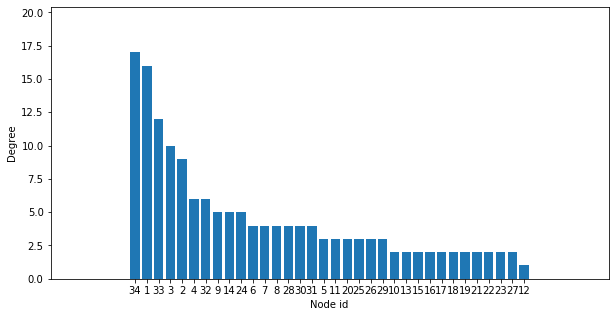

In [6]:
# show node degrees
plt.figure(1, figsize=(10, 5))
plt.bar(np.arange(34), list(dk.values()))
plt.xticks(np.arange(34), list(dk.keys()))
plt.margins(0.2)
plt.ylabel('Degree')
plt.xlabel('Node id')

Now we have meet some basics of plotting and data manipulations in *networkX*. For more details visit the following web-pages:

* [NetworkX Documentation](http://networkx.github.io/documentation/latest/)
* [PyPlot tutorial](http://matplotlib.org/users/pyplot_tutorial.html)
* [Matrix manimulation cheat-sheet](http://sebastianraschka.com/Articles/2014_matrix_cheatsheet_table.html)

In [81]:
# Find node with highest degree
next(iter(dk))

'34'

In [8]:
# Find connected components
CC = nx.connected_components(G)

CC0 = sorted(nx.connected_components(G), key = len, reverse=True)

for v in CC0:
    print(v)

{'Node 26', 'Node 9', 'Node 24', 'Node 25', 'Node 17', 'Node 2', 'Node 8', 'Node 34', 'Node 31', 'Node 29', 'Node 5', 'Node 30', 'Node 1', 'Node 19', 'Node 20', 'Node 12', 'Node 28', 'Node 16', 'Node 21', 'Node 11', 'Node 6', 'Node 33', 'Node 22', 'Node 10', 'Node 23', 'Node 4', 'Node 15', 'Node 7', 'Node 14', 'Node 13', 'Node 3', 'Node 18', 'Node 27', 'Node 32'}


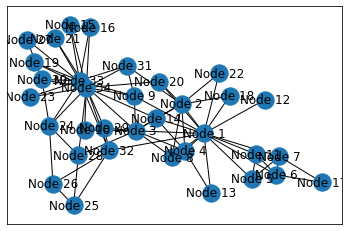

In [9]:
# Draw subgraph
SG = G.subgraph(CC0[0])
nx.radius(SG)
nx.draw_networkx(SG)